In [1]:
from preamble import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [6]:
df1 = pd.read_csv('./data/l_lstm_data_v4.csv')
df2 = pd.read_csv('./data/l_before_feature_importance_v3.csv')
df1.shape, df2.shape

((15741, 22), (15741, 34))

In [7]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    lstm_out, _ = self.lstm(x)
    last_out = lstm_out[:, -1, :]
    out = self.fc(last_out)
    return out

input_size = 21
hidden_size = 50
output_size = 24
model_lstm = LSTMModel(input_size, hidden_size, output_size)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
model_lstm.load_state_dict(torch.load('./model/best_lstm_checkpoint_l.pt'))
model_lstm.to(device)

C:\Users\user\AppData\Local\Temp\ipykernel_5768\2465038659.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_lstm.load_state_dict(torch.load('./model/best_lstm_check

LSTMModel(
  (lstm): LSTM(21, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=24, bias=True)
)

In [15]:
model_xgb = xgb.Booster()
model_xgb.load_model('./model/24hour_xgboost_all_features_model_l.bin')

In [20]:
try:
  data_lstm_j = pd.read_csv('./data/j_lstm_data_v4.csv')
  data_lstm_j['datetime'] = pd.to_datetime(data_lstm_j['datetime'])  # 'datetime' 컬럼을 datetime 객체로 변환
except FileNotFoundError:
  print('Error: j_lstm_data_v4.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_lstm_d = pd.read_csv('./data/d_lstm_data_v4.csv')
  data_lstm_d['datetime'] = pd.to_datetime(data_lstm_d['datetime'])  # 'datetime' 컬럼을 datetime 객체로 변환
except FileNotFoundError:
  print('Error: d_lstm_data_v4.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_lstm_l = pd.read_csv('./data/l_lstm_data_v4.csv')
  data_lstm_l['datetime'] = pd.to_datetime(data_lstm_l['datetime'])  # 'datetime' 컬럼을 datetime 객체로 변환
except FileNotFoundError:
  print('Error: l_lstm_data_v4.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_xgb_j = pd.read_csv('./data/j_before_feature_importance_with_datetime_v3.csv')
  data_xgb_j['datetime'] = pd.to_datetime(data_xgb_j['datetime'])
except FileNotFoundError:
  print('Error: j_before_feature_importance_with_datetime_v3.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_xgb_d = pd.read_csv('./data/d_before_feature_importance_with_datetime_v3.csv')
  data_xgb_d['datetime'] = pd.to_datetime(data_xgb_d['datetime'])
except FileNotFoundError:
  print('Error: d_before_feature_importance_with_datetime_v3.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_xgb_l = pd.read_csv('./data/l_before_feature_importance_with_datetime_v3.csv')
  data_xgb_l['datetime'] = pd.to_datetime(data_xgb_l['datetime'])
except FileNotFoundError:
  print('Error: l_before_feature_importance_with_datetime_v3.csv 파일을 찾을 수 없습니다.')
  exit()
try:
  data_djl = pd.read_csv('./data/reservoir_djl_hourly.csv')
  data_djl['observation_time'] = pd.to_datetime(data_djl['observation_time'])
except FileNotFoundError:
  print('Error: reservoir_djl_hourly.csv 파일을 찾을 수 없습니다.')
  exit()

In [21]:
try:
  model_lstm_j = LSTMModel(input_size, hidden_size, output_size)
  model_lstm_j.load_state_dict(torch.load('./model/best_lstm_checkpoint_j.pt', map_location=device))
  model_lstm_j.to(device)
  model_lstm_j.eval()
except FileNotFoundError:
  print('Error: best_lstm_checkpoint_j.pt 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()
try:
  model_lstm_d = LSTMModel(input_size, hidden_size, output_size)
  model_lstm_d.load_state_dict(torch.load('./model/best_lstm_checkpoint_d.pt', map_location=device))
  model_lstm_d.to(device)
  model_lstm_d.eval()
except FileNotFoundError:
  print('Error: best_lstm_checkpoint_d.pt 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()
try:
  model_lstm_l = LSTMModel(input_size, hidden_size, output_size)
  model_lstm_l.load_state_dict(torch.load('./model/best_lstm_checkpoint_l.pt', map_location=device))
  model_lstm_l.to(device)
  model_lstm_l.eval()
except FileNotFoundError:
  print('Error: best_lstm_checkpoint_l.pt 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()

try:
  model_xgb_j = xgb.Booster(model_file='./model/24hour_xgboost_all_features_model_250212_j.json')
except FileNotFoundError:
  print('Error: 24hour_xgboost_all_features_model_250212.json 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()

try:
  model_xgb_d = xgb.Booster(model_file='./model/24hour_xgboost_all_features_model_250212_d.json')
except FileNotFoundError:
  print('Error: 24hour_xgboost_all_features_model_250212.json 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()

try:
  model_xgb_l = xgb.Booster(model_file='./model/24hour_xgboost_all_features_model_l.json')
except FileNotFoundError:
  print('Error: 24hour_xgboost_all_features_model_250212.json 파일을 찾을 수 없습니다.')
  exit()
except Exception as e:
  print(f'Error loading model: {e}')
  exit()

C:\Users\user\AppData\Local\Temp\ipykernel_5768\2808751228.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_lstm_j.load_state_dict(torch.load('./model/best_lstm_che

In [25]:
import pickle

with open('./model/scaler_feature_lstm_j.pkl', 'rb') as f:
  loaded_scaler_feature_j = pickle.load(f)
with open('./model/scaler_target_lstm_j.pkl', 'rb') as f:
  loaded_scaler_target_j = pickle.load(f)
with open('./model/scaler_feature_lstm_d.pkl', 'rb') as f:
  loaded_scaler_feature_d = pickle.load(f)
with open('./model/scaler_target_lstm_d.pkl', 'rb') as f:
  loaded_scaler_target_d = pickle.load(f)
with open('./model/scaler_feature_lstm_l.pkl', 'rb') as f:
  loaded_scaler_feature_l = pickle.load(f)
with open('./model/scaler_target_lstm_l.pkl', 'rb') as f:
  loaded_scaler_target_l = pickle.load(f)


In [26]:
def get_xgb_model_and_data(name):
  if (name == 'j'):
    return model_xgb_j, data_xgb_j
  elif (name == 'd'):
    return model_xgb_d, data_xgb_d
  elif (name == 'l'):
    return model_xgb_l, data_xgb_l

def get_lstm_model_data_and_scaler(name):
  if (name == 'j'):
    return model_lstm_j, data_lstm_j, loaded_scaler_feature_j, loaded_scaler_target_j
  elif (name == 'd'):
    return model_lstm_d, data_lstm_d, loaded_scaler_feature_d, loaded_scaler_target_d
  elif (name == 'l'):
    return model_lstm_l, data_lstm_l, loaded_scaler_feature_l, loaded_scaler_target_l

In [32]:
def predict_lstm(dt, name):  # dt는 datetime 객체
  print('lstm 실행')
  model, data_lstm, loaded_scaler_feature, loaded_scaler_target = get_lstm_model_data_and_scaler(name)
  
  model.eval()
  past_data = data_lstm[data_lstm['datetime'] < dt].tail(168)
  start_time = past_data.iloc[-1]['datetime'] + timedelta(hours=1)
  if len(past_data) != 168:
    raise ValueError('이전 168개의 데이터를 찾을 수 없습니다.')

  input_data = past_data.drop('datetime', axis=1).values.astype(np.float32)
  scaled_input_data = loaded_scaler_feature.transform(input_data)

  input_tensor = torch.tensor(scaled_input_data).unsqueeze(0).to(device) # (batch_size, sequence_length, input_size)

  with torch.no_grad():
    predicted = model(input_tensor)

  predicted = predicted.cpu().numpy()

  predicted_original = loaded_scaler_target.inverse_transform(predicted)

  # pred_arr = make_return_form(predicted_original[0], start_time)
  # print(pred_arr)
  return predicted_original[0]

def predict_xgb(dt, model, data):
  past_data = data[data['datetime'] < dt].tail(168)
  start_time = past_data.iloc[-1]['datetime'] + timedelta(hours=1)

  if len(past_data) != 168:
    raise ValueError('이전 168개의 데이터를 찾을 수 없습니다.')

  input_data = past_data.drop('datetime', axis=1).values.astype(np.float32)
  # print(input_data.shape)
  dtest = xgb.DMatrix(input_data.reshape(1, -1))
  pred = model.predict(dtest)
  # print(pred)
  # result = make_return_form(pred[0], start_time)
  return pred[0]

In [33]:
from datetime import timedelta 

In [49]:
test_pred_lstm = predict_lstm('2023-10-01T00:00', 'l')
print(test_pred_lstm)
test_pred_xgb = predict_xgb('2023-10-01T00:00', model_xgb, data_xgb_l)
print(test_pred_xgb)

lstm 실행
[33.038 32.461 31.672 31.01  31.17  36.829 43.809 48.854 71.484 71.818
 67.154 64.218 62.868 59.046 58.382 55.8   58.118 64.927 66.935 61.374
 53.229 46.538 37.875 38.359]
[33.825 32.02  31.727 32.541 33.584 39.238 40.253 40.679 72.932 73.724
 65.896 63.138 59.396 59.43  58.372 58.348 58.254 65.047 67.222 60.431
 50.606 45.355 43.067 36.047]


c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
past_data = data_xgb_l[data_xgb_l['datetime'] < '2023-10-01T00:00'].tail(168)
start_time = past_data.iloc[-1]['datetime'] + timedelta(hours=1)
start_time

Timestamp('2023-10-01 00:00:00')

In [54]:
data = data_xgb_l[data_xgb_l['datetime'] >= start_time]
datetime_range = data.iloc[:24]['datetime']
datetime_range

6552   2023-10-01 00:00:00
6553   2023-10-01 01:00:00
6554   2023-10-01 02:00:00
6555   2023-10-01 03:00:00
6556   2023-10-01 04:00:00
6557   2023-10-01 05:00:00
6558   2023-10-01 06:00:00
6559   2023-10-01 07:00:00
6560   2023-10-01 08:00:00
6561   2023-10-01 09:00:00
6562   2023-10-01 10:00:00
6563   2023-10-01 11:00:00
6564   2023-10-01 12:00:00
6565   2023-10-01 13:00:00
6566   2023-10-01 14:00:00
6567   2023-10-01 15:00:00
6568   2023-10-01 16:00:00
6569   2023-10-01 17:00:00
6570   2023-10-01 18:00:00
6571   2023-10-01 19:00:00
6572   2023-10-01 20:00:00
6573   2023-10-01 21:00:00
6574   2023-10-01 22:00:00
6575   2023-10-01 23:00:00
Name: datetime, dtype: datetime64[ns]

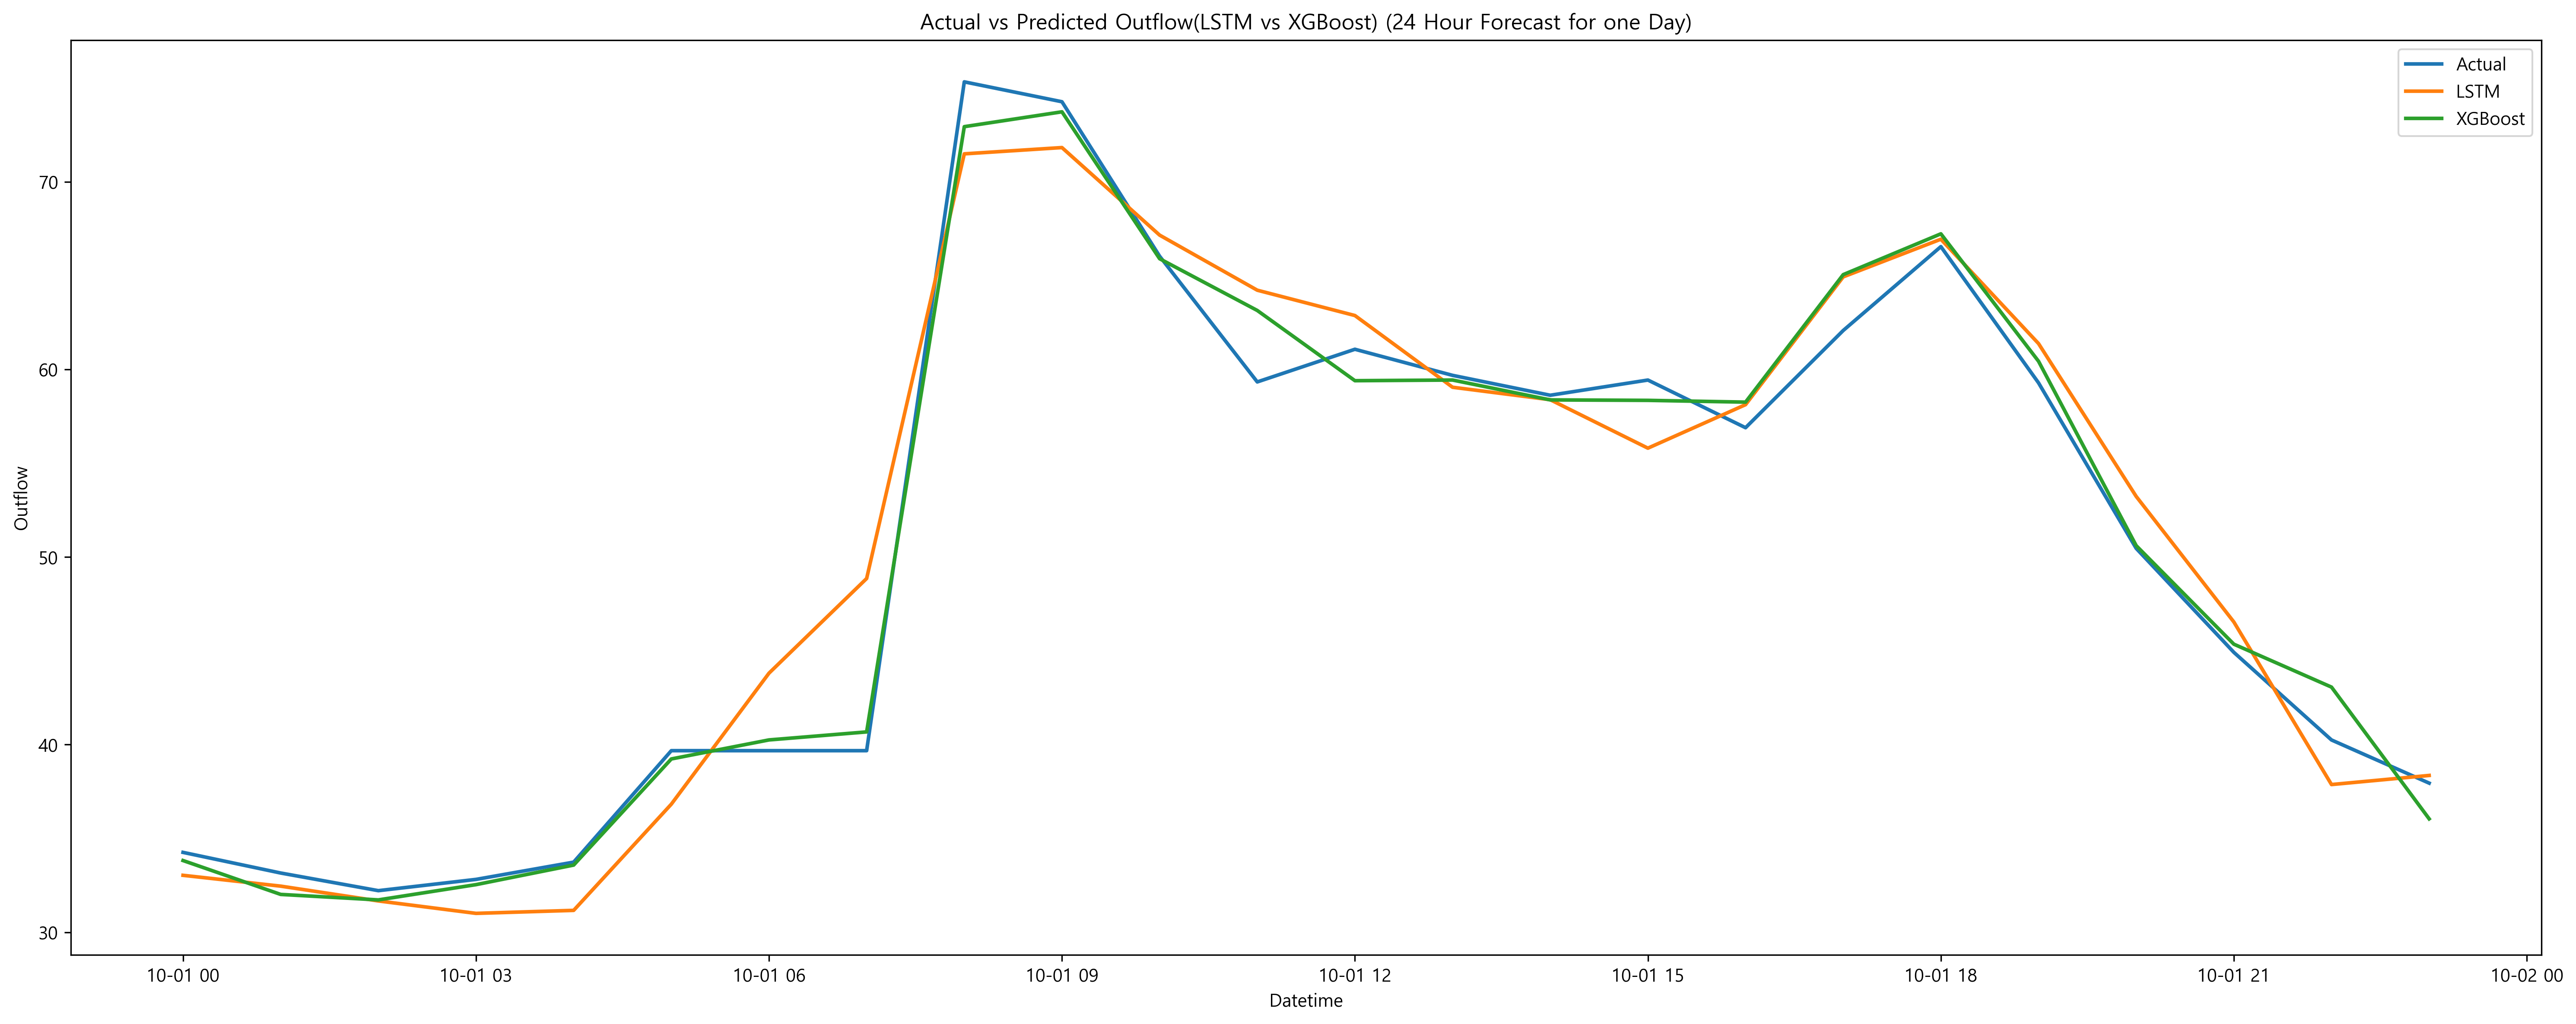

In [55]:
# 시각화
plt.figure(figsize=(20, 8))
actual = data.iloc[:24]['outflow']

plt.plot(datetime_range, actual, label='Actual')
plt.plot(datetime_range, test_pred_lstm, label='LSTM')
plt.plot(datetime_range, test_pred_xgb, label='XGBoost')

# plt.xticks([])  # x축 눈금 제거
plt.xlabel('Datetime')
plt.ylabel('Outflow')
plt.title('Actual vs Predicted Outflow(LSTM vs XGBoost) (24 Hour Forecast for one Day)')
plt.legend(loc='upper right') # legend 위치 조정
plt.tight_layout()        # 레이아웃 조정
plt.show()

In [56]:
test_pred_lstm_week = []
test_pred_xgb_week = []
dts = ['2023-10-01T00:00', '2023-10-02T00:00', '2023-10-03T00:00', '2023-10-04T00:00', '2023-10-05T00:00', '2023-10-06T00:00', '2023-10-07T00:00']
for dt in dts:
  lstm_pred =  predict_lstm(dt, 'l')
  test_pred_lstm_week.append(lstm_pred)
  xbg_pred = predict_xgb(dt, model_xgb, data_xgb_l)
  test_pred_xgb_week.append(xbg_pred)

lstm 실행
lstm 실행
lstm 실행
lstm 실행
lstm 실행
lstm 실행
lstm 실행


c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\DevTool\anaconda3\envs\torch_book\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\DevTool\anaconda3\envs\torch_book\Lib\site-pack

In [62]:
test_pred_lstm_week = np.array(test_pred_lstm_week).flatten()
test_pred_xgb_week = np.array(test_pred_xgb_week).flatten()

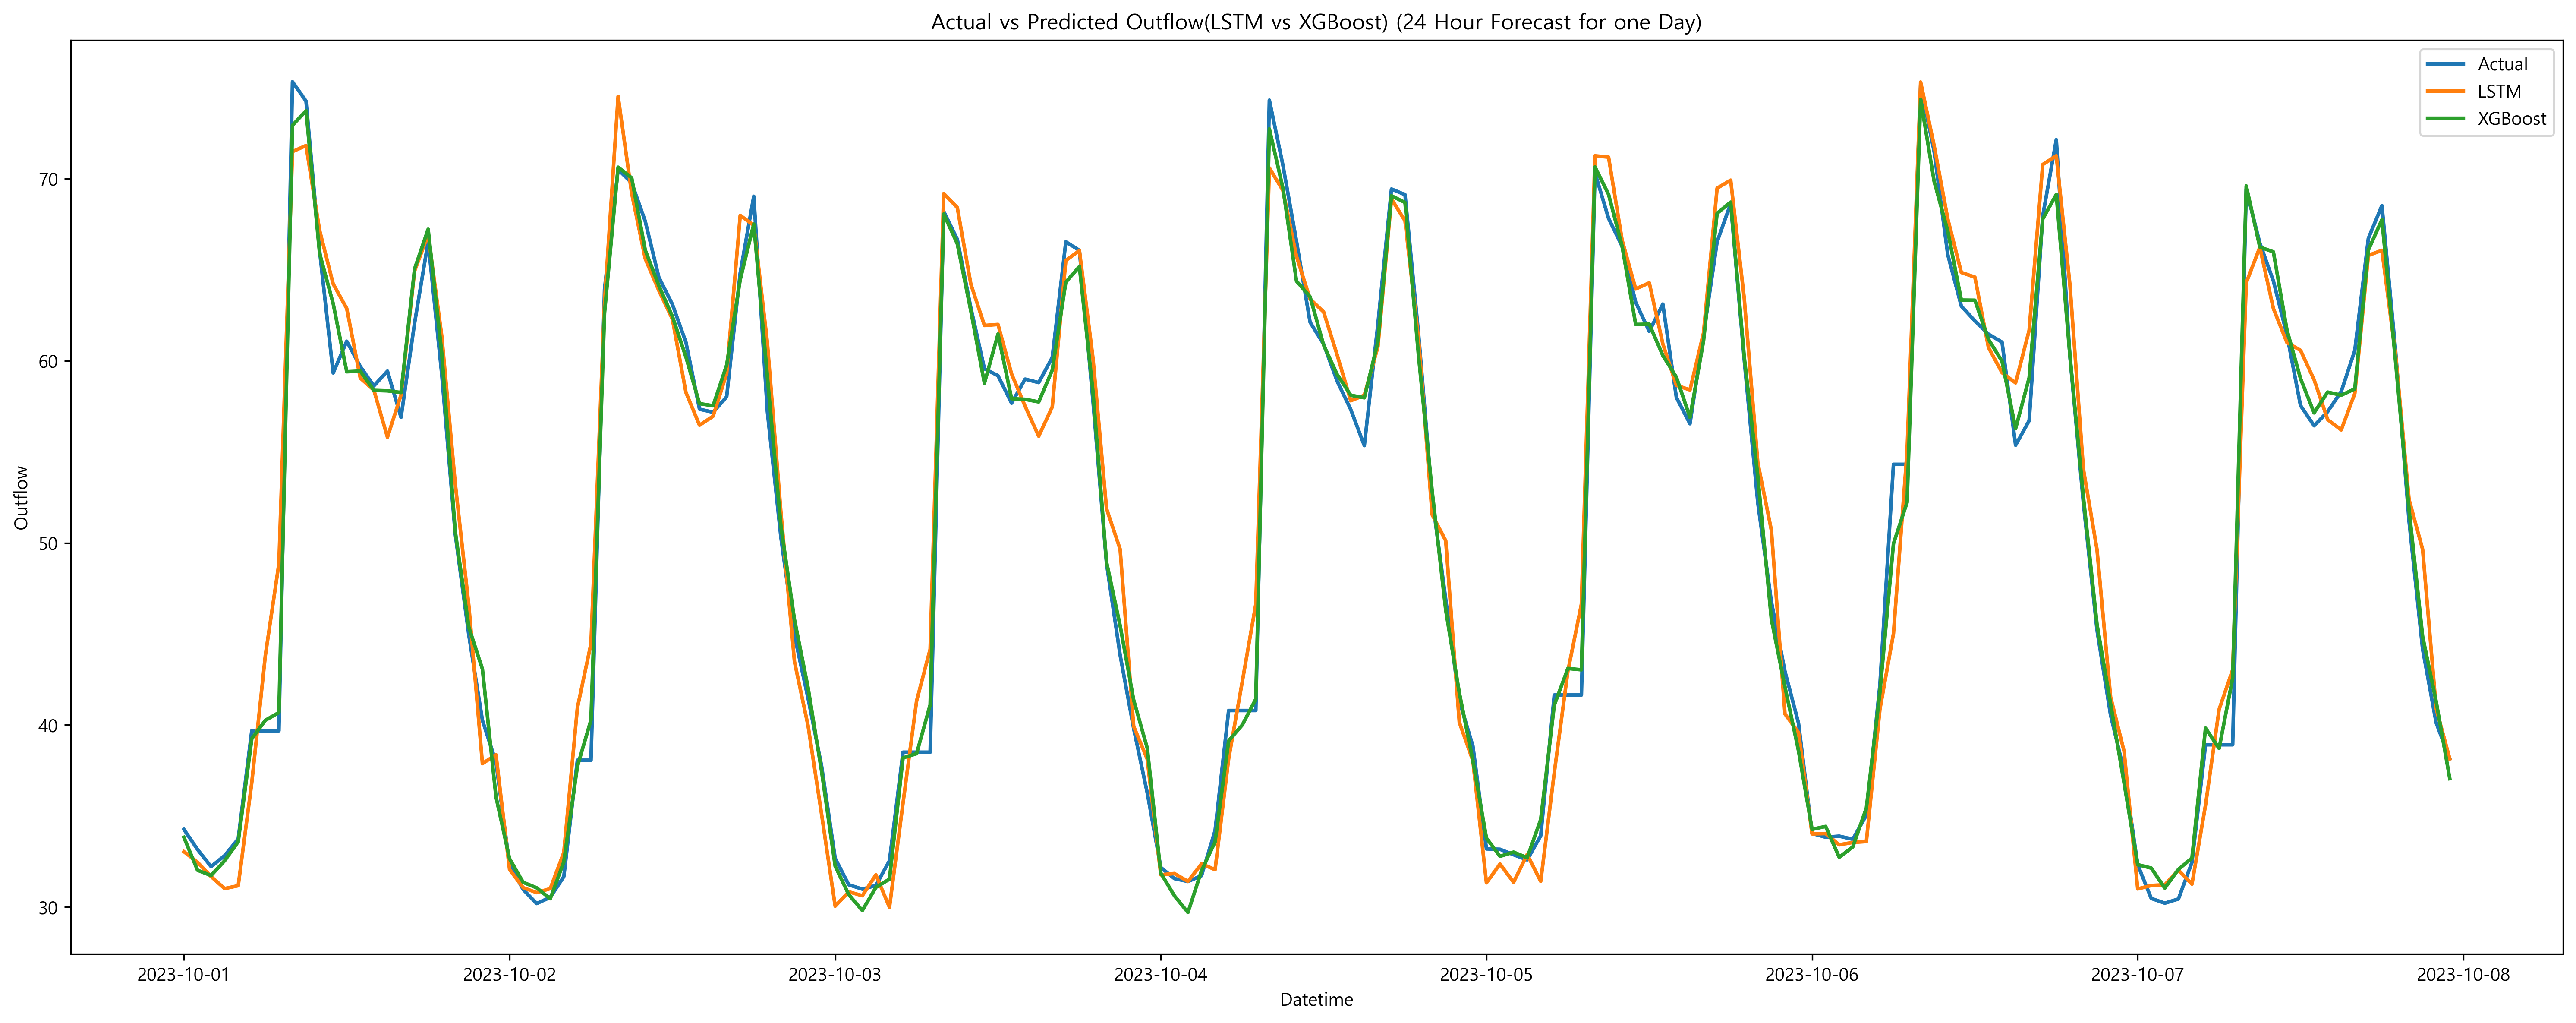

In [63]:
# 시각화
plt.figure(figsize=(20, 8))
datetime_range_week = data.iloc[:168]['datetime']
actual = data.iloc[:168]['outflow']

plt.plot(datetime_range_week, actual, label='Actual')
plt.plot(datetime_range_week, test_pred_lstm_week, label='LSTM')
plt.plot(datetime_range_week, test_pred_xgb_week, label='XGBoost')

# plt.xticks([])  # x축 눈금 제거
plt.xlabel('Datetime')
plt.ylabel('Outflow')
plt.title('Actual vs Predicted Outflow(LSTM vs XGBoost) (24 Hour Forecast for one Day)')
plt.legend(loc='upper right') # legend 위치 조정
plt.tight_layout()        # 레이아웃 조정
plt.show()